# Frequent  Hashtags & User Mentions in Tweets & Retweets

### i.e. #amazon & @amazon

- Making a list of all the hashtags/user_mentions
- Cleaning the list
- Using collections.Counter to count the frequencies
- Plotting bar charts for the top 30 frequent hashtags and mentions

Note that the collected tweets were a small fraction of the actual tweet volume about Black Friday and Cyber Monday. Twitter streaming is limited to a small fraction of the total volume of tweets at any given moment when a popular topic is being tracked. Therefore, the volumes presented here should be only used in a relative sense for comparison purposes.


### Part 1: Tweets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# read a few columns of the tweet data
tweets = pd.read_csv('df_tweets.csv', low_memory=False, usecols=['hashtags', 'user_mentions'])

In [3]:
tweets.head()

,user_mentions,hashtags
0,['Pimkie_ES'],"['descuento', 'BlackFriday', 'ccrosaleda']"
1,[],['BlackFriday2017']
2,[],"['AMAZON', 'DEALS', 'Christmas', 'holiday', 't..."
3,['blackfriday'],"['BlackFriday', 'CORSETS', 'dress', 'fashion']"
4,[],"['ghd', 'Christmas', 'hair', 'BlackFriday', 'B..."


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672773 entries, 0 to 1672772
Data columns (total 2 columns):
user_mentions    1672773 non-null object
hashtags         1672773 non-null object
dtypes: object(2)
memory usage: 25.5+ MB


In [5]:
# Making a list of hashtags in all the tweets
hashtag_list = ''.join(tweets['hashtags']).lower()
print('Joined List of Hashtags - sample:')
print(hashtag_list[:300])

hashtag_list = hashtag_list.replace('][', ', ').strip('[]').replace("'",'').split(', ')
print('\n''Clean List of Hashtags - sample:')
print(hashtag_list[:10])

Joined List of Hashtags - sample:
['descuento', 'blackfriday', 'ccrosaleda']['blackfriday2017']['amazon', 'deals', 'christmas', 'holiday', 'toys', 'kids', 'moms', 'blackfriday', 'shopping']['blackfriday', 'corsets', 'dress', 'fashion']['ghd', 'christmas', 'hair', 'blackfriday', 'blackfriday2017', 'gift', 'dealoftheday', 'salonlife']

Clean List of Hashtags - sample:
['descuento', 'blackfriday', 'ccrosaleda', 'blackfriday2017', 'amazon', 'deals', 'christmas', 'holiday', 'toys', 'kids']


In [6]:
# Counting the frequency of hashtags (or the lack of them)
hashtag_counter = Counter(hashtag_list)
hashtag_counter.most_common(50)

[('blackfriday', 1081416),
 ('cybermonday', 343318),
 ('', 187495),
 ('blackfriday2017', 95934),
 ('sale', 90852),
 ('giveaway', 76378),
 ('blackfridaydeals', 72698),
 ('deals', 65130),
 ('christmas', 33815),
 ('thanksgiving', 28237),
 ('amazon', 26782),
 ('shopping', 24858),
 ('netneutrality', 24363),
 ('fashion', 23807),
 ('amazongiveaway', 21423),
 ('cybermonday2017', 21075),
 ('bestprice', 20670),
 ('discount', 20571),
 ('cybermondaydeals', 16559),
 ('save', 16293),
 ('ad', 15717),
 ('win', 14548),
 ('sales', 14084),
 ('gifts', 12576),
 ('deal', 12347),
 ('giftideas', 12225),
 ('mondaymotivation', 12144),
 ('rt', 11926),
 ('shopsmall', 11733),
 ('blackfridaysale', 11311),
 ('givingtuesday', 10735),
 ('etsy', 10334),
 ('handmade', 9153),
 ('ebay', 9102),
 ('gift', 8908),
 ('follow', 8905),
 ('smallbusinesssaturday', 8396),
 ('necklace', 7954),
 ('xboxonex', 7951),
 ('free', 7902),
 ('jewelry', 7893),
 ('freebie', 7584),
 ('shop', 7496),
 ('coupons', 7392),
 ('holiday', 7311),
 ('cou

In [7]:
# Making a list of user_mentions in all the tweets
mentions_list = ''.join(tweets['user_mentions']).lower()
print('Joined List of Mentions - sample:')
print(mentions_list[:300])
mentions_list = mentions_list.replace('][', ', ').strip('[]').replace("'",'').split(', ')
print('\n''Clean List of Mentions - sample:')
print(mentions_list[:10])

Joined List of Mentions - sample:
['pimkie_es'][][]['blackfriday'][][][][][]['vastland_tech'][][][]['ozonegaminges'][][]['steerssa'][][][]['empathybro', 'imagineyourdata'][][][][][][][]['vastland_tech']['bt_uk']['wonderworkshop'][]['vastland_tech'][]['wonderworkshop'][]['retailweek']['voxeloficial'][][][]['cnnindonesia']['sony', 'am

Clean List of Mentions - sample:
['pimkie_es', '', '', 'blackfriday', '', '', '', '', '', 'vastland_tech']


In [8]:
# Counting the frequency of mentions (or the lack of them)
mentions_counter = Counter(mentions_list)
mentions_counter.most_common(50)

[('', 1273729),
 ('wonderworkshop', 17396),
 ('etsy', 10292),
 ('amazon', 9446),
 ('ebay', 7621),
 ('mailbird', 7109),
 ('trendboutiqueco', 5401),
 ('thrifterdaily', 4964),
 ('vastland_tech', 4251),
 ('banzaivapors', 3997),
 ('sywsweeps', 3482),
 ('cdiscount', 3354),
 ('bt_uk', 3298),
 ('fusiontrekcom', 2707),
 ('youtube', 2667),
 ('argos_online', 2523),
 ('bestvpn_com', 2478),
 ('slotlimited', 2186),
 ('amazonsmile', 1966),
 ('bloomplanners', 1848),
 ('blackfriday', 1705),
 ('amazonuk', 1699),
 ('walmart', 1685),
 ('go2towel', 1590),
 ('realdonaldtrump', 1561),
 ('redbubble', 1492),
 ('rewardmycause', 1460),
 ('joinpouch', 1316),
 ('bestbuy', 1289),
 ('bfads', 1219),
 ('target', 1184),
 ('zazzle', 1090),
 ('retale', 1077),
 ('wearedoomclan', 1034),
 ('ozonegaminges', 993),
 ('society6', 944),
 ('apple', 940),
 ('fatkiddeals', 896),
 ('clipteez', 862),
 ('takealot', 848),
 ('togotec', 822),
 ('easysmx_gaming', 770),
 ('amazondeals', 733),
 ('usatoday', 677),
 ('audible_com', 622),
 ('g

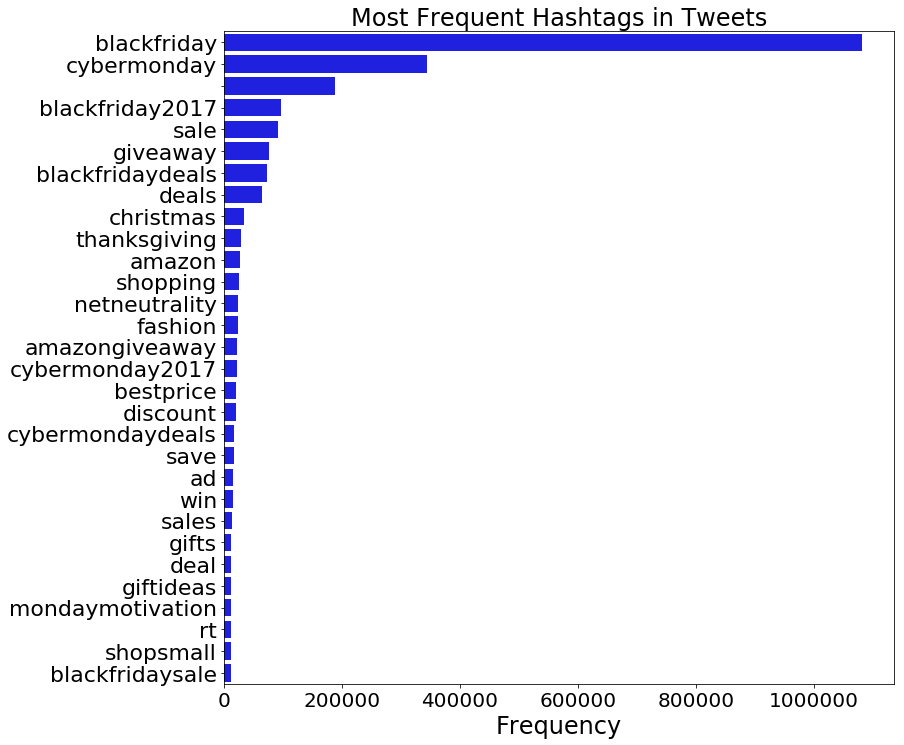

In [9]:
# making a dictionary of the counter to be used in plotting
hashtag_dict = dict(hashtag_counter.most_common(30))
hashtag_words = list(hashtag_dict.keys())[:30]
hashtag_counts = list(hashtag_dict.values())[:30]
# bar chart
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)
_ = sns.barplot(x=hashtag_counts, y=hashtag_words, ax=ax, color='blue')
_ = ax.tick_params(axis='x', which='major', labelsize=20)
_ = ax.tick_params(axis='y', which='major', labelsize=22)
_ = ax.set_xlabel('Frequency', fontsize=24)
_ = ax.set_ylabel('')
_ = ax.set_title('Most Frequent Hashtags in Tweets', fontsize=24)

Number of tweets without mentions: 1273729 out of 1672773 collected tweets


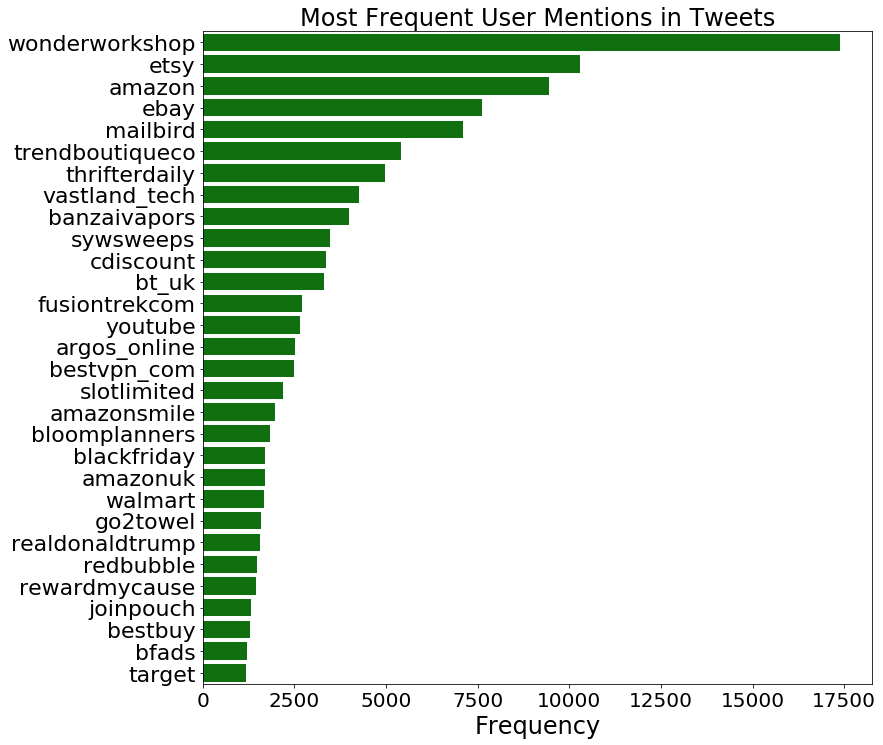

In [10]:
# making a dictionary of the counter to be used in plotting
mentions_dict = dict(mentions_counter.most_common(31))
mentions_words = list(mentions_dict.keys())
mentions_counts = list(mentions_dict.values())

print('Number of tweets without mentions:', mentions_counts[0], 'out of', len(tweets),'collected tweets')

# bar plot
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 12)

# I skip the first element which is the count of the tweets with no mentions
_ = sns.barplot(x=mentions_counts[1:31], y=mentions_words[1:31], color='green')
_ = ax.tick_params(axis='x', which='major', labelsize=20)
_ = ax.tick_params(axis='y', which='major', labelsize=22)
_ = ax.set_xlabel('Frequency', fontsize=24)
_ = ax.set_ylabel('')
_ = ax.set_title('Most Frequent User Mentions in Tweets', fontsize=24)

### Part 2: Retweets

Number of retweets without mentions: 2066334


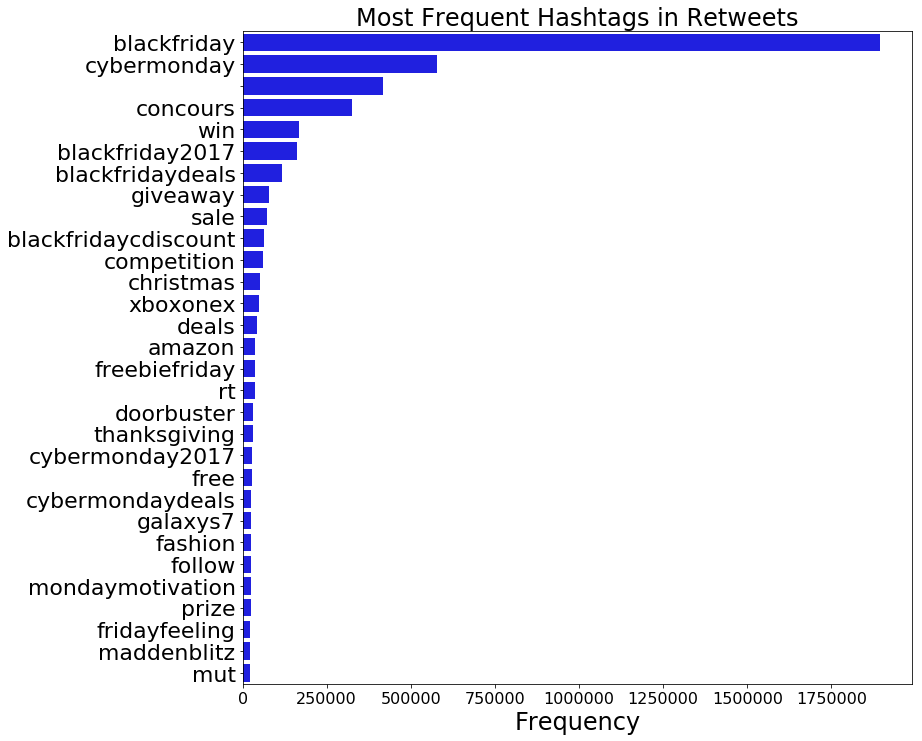

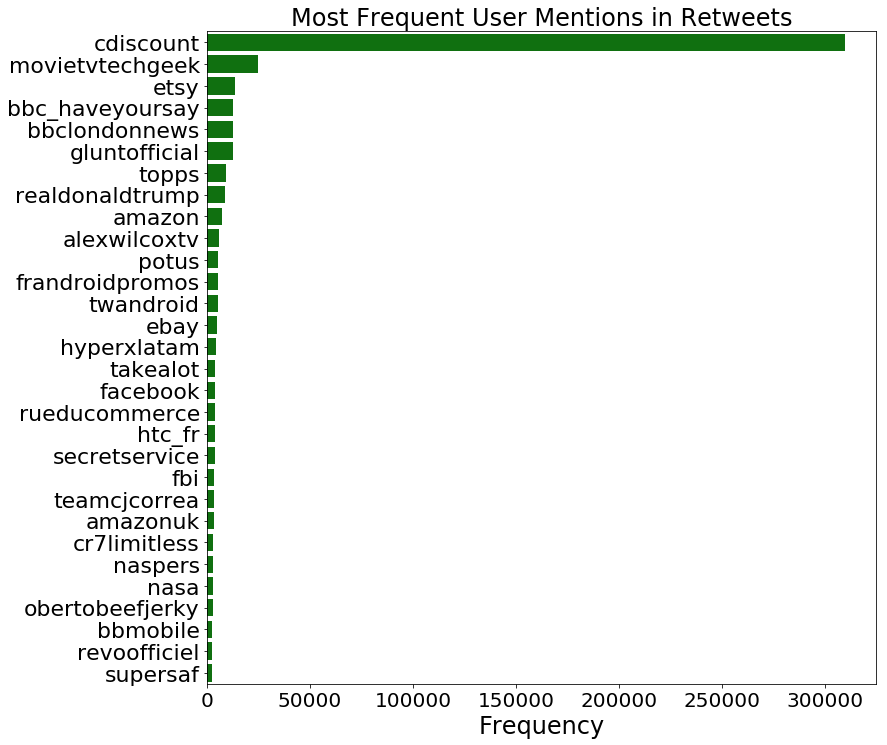

In [11]:
# Free up the memory
tweets = pd.DataFrame()
hashtag_list = []
hashtag_counter = []
mentions_list = []
mentions_counter = []

# read a few columns of the retweet data
tweets = pd.read_csv('df_retweets.csv', low_memory=False, usecols=['hashtags', 'user_mentions'])

# Exact same process

hashtag_list = ''.join(tweets['hashtags']).lower().replace('][', ', ').strip('[]').replace("'",'').split(', ')
hashtag_counter = Counter(hashtag_list)

mentions_list = ''.join(tweets['user_mentions']).lower().replace('][', ', ').strip('[]').replace("'",'').split(', ')
mentions_counter = Counter(mentions_list)

hashtag_dict = dict(hashtag_counter.most_common(30))
hashtag_words = list(hashtag_dict.keys())[:30]
hashtag_counts = list(hashtag_dict.values())[:30]

fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)
_ = sns.barplot(x=hashtag_counts, y=hashtag_words, ax=ax, color='blue')
_ = ax.tick_params(axis='x', which='major', labelsize=16)
_ = ax.tick_params(axis='y', which='major', labelsize=22)
_ = ax.set_xlabel('Frequency', fontsize=24)
_ = ax.set_ylabel('')
_ = ax.set_title('Most Frequent Hashtags in Retweets', fontsize=24)


mentions_dict = dict(mentions_counter.most_common(31))
mentions_words = list(mentions_dict.keys())
mentions_counts = list(mentions_dict.values())
print('Number of retweets without mentions:', mentions_counts[0])

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 12)
_ = sns.barplot(x=mentions_counts[1:31], y=mentions_words[1:31], color='green')
_ = ax.tick_params(axis='x', which='major', labelsize=20)
_ = ax.tick_params(axis='y', which='major', labelsize=22)
_ = ax.set_xlabel('Frequency', fontsize=24)
_ = ax.set_ylabel('')
_ = ax.set_title('Most Frequent User Mentions in Retweets', fontsize=24)

### Part 3: Comparison between the Retailers

In [13]:
retailers = ['amazon', 'etsy', 'samsung', 'apple', 'walmart', 'ebay', 'target',\
             'bestbuy', 'microsoft','sephora', 'homedepot','starbucks', 'nordstrom', 'toysrus', 'macys', 'kohls']

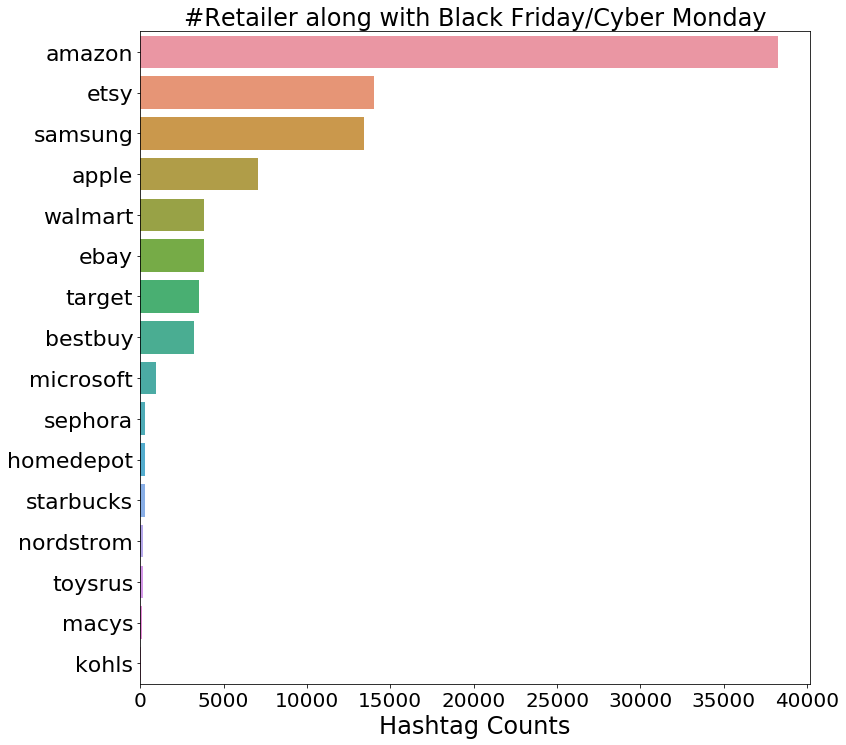

In [15]:
complete_hashtag_dict = dict(hashtag_counter)
retailers_hashtag_counts = [complete_hashtag_dict[x] for x in retailers]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 12)
_ = sns.barplot(x=retailers_hashtag_counts, y=retailers)
_ = ax.tick_params(axis='x', which='major', labelsize=20)
_ = ax.tick_params(axis='y', which='major', labelsize=22)
_ = ax.set_xlabel('Hashtag Counts',fontsize=24)
_ = ax.set_title('#Retailer along with Black Friday/Cyber Monday', fontsize=24)

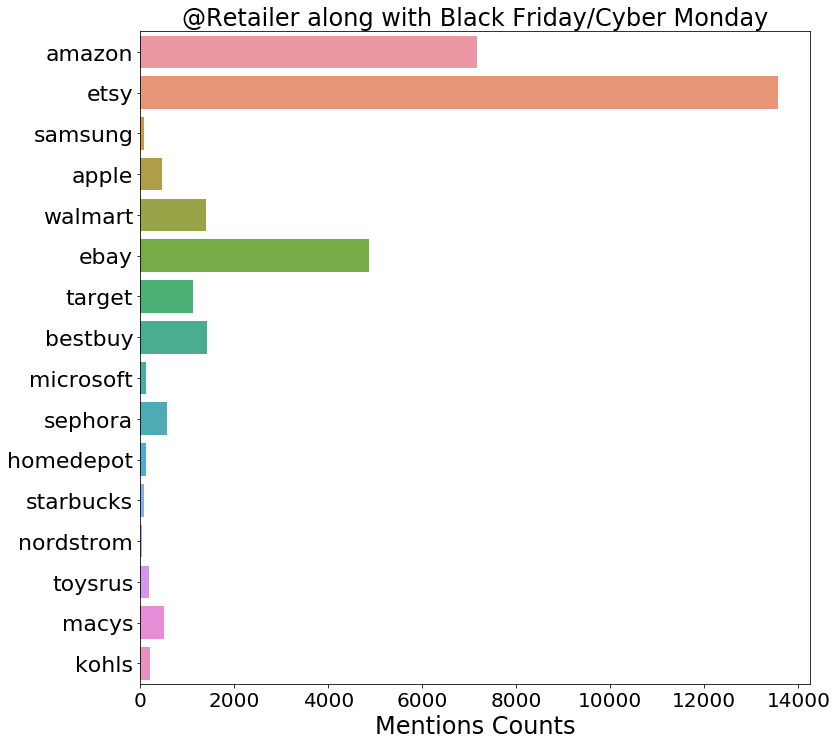

In [16]:
complete_mention_dict = dict(mentions_counter)
retailers_mention_counts = [complete_mention_dict[x] for x in retailers]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 12)
_ = sns.barplot(x=retailers_mention_counts, y=retailers)
_ = ax.tick_params(axis='x', which='major', labelsize=20)
_ = ax.tick_params(axis='y', which='major', labelsize=22)
_ = ax.set_xlabel('Mentions Counts',fontsize=24)
_ = ax.set_title('@Retailer along with Black Friday/Cyber Monday', fontsize=24)

In [18]:
mentions_counter.most_common(200)

[('', 2066334),
 ('cdiscount', 309387),
 ('movietvtechgeek', 24931),
 ('etsy', 13565),
 ('bbc_haveyoursay', 12933),
 ('bbclondonnews', 12932),
 ('gluntofficial', 12772),
 ('topps', 9222),
 ('realdonaldtrump', 8600),
 ('amazon', 7174),
 ('alexwilcoxtv', 5756),
 ('potus', 5324),
 ('frandroidpromos', 5211),
 ('twandroid', 5200),
 ('ebay', 4858),
 ('hyperxlatam', 4351),
 ('takealot', 3961),
 ('facebook', 3960),
 ('rueducommerce', 3841),
 ('htc_fr', 3797),
 ('secretservice', 3786),
 ('fbi', 3665),
 ('teamcjcorrea', 3653),
 ('amazonuk', 3378),
 ('cr7limitless', 3230),
 ('naspers', 3075),
 ('nasa', 3038),
 ('obertobeefjerky', 3034),
 ('bbmobile', 2696),
 ('revoofficiel', 2693),
 ('supersaf', 2680),
 ('mediamarkt_es', 2678),
 ('elliott_sadler', 2275),
 ('id_mobile_uk', 2143),
 ('bose', 2122),
 ('amazonsmile', 2028),
 ('actug', 1997),
 ('tyre_pros', 1962),
 ('prizee_officiel', 1909),
 ('fabienolicard', 1892),
 ('theicollection', 1792),
 ('janklaar2', 1784),
 ('enjoyflowerusa', 1780),
 ('assstar